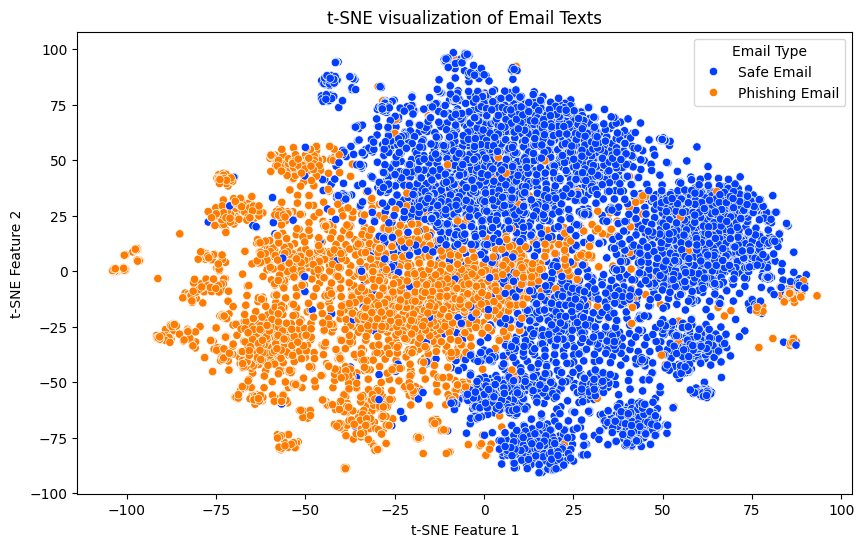

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import spacy

nlp = spacy.load('en_core_web_md')

# Load the dataset
df = pd.read_csv('../data/processed/train_emails.csv')

# Ensure all entries in 'Email Text' are strings and handle NaNs
df['Email Text'] = df['Email Text'].astype(str).fillna('')

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Email Text'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Email Type'] = df['Email Type']

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Email Type', data=df_tsne, palette='bright')
plt.title('t-SNE visualization of Email Texts')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Word embdedding TSNE
